
<h1><center>
EE215, Fall 2018: Coding Assignment 2 <br>
</center></h1>
$
\textbf{Written by}:\\
\small
\text{Abhishek Aich} \\
\text{SID: 862061477} \\
\texttt{aaich@ece.ucr.edu}
$   



## <span style="color:blue">Initializations:</span>

Import required packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

Import dataset file _adult.data.txt_ to a csv file and initialize the column names of the data set:

In [2]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational_num','marital_status', 'occupation', 'relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country','income']

adult = pd.read_csv('adult.data.txt', sep=",\s", header=None, names = column_names, engine='python')

Map the "$income$" and "$sex$" features into 0/1 variables by assigning '0' to $income$ ≤ 50K, and '1' to $income$ > 50K and '0' to $sex$ = Male and '1' to $sex$ = Female:

In [3]:
adult["income"] = adult["income"].map({ "<=50K": 0, ">50K"  : 1 })
adult["sex"] = adult["sex"].map({ "Male" : 0, "Female": 1 })

Extract our columns of interest in $\textbf{X}$:

In [4]:
columns = ["income", "age", "sex", "capital_gain", "hours_per_week"]
X = pd.DataFrame(adult, columns=columns)

## <span style="color:blue">Empirical covariance,  correlation and mean of $\textbf{X}$ : </span> 

$
\large
\text{cov}(\textbf{X}) = \text{corr}(\textbf{X}) - \mu\mu^T,\qquad
\text{corr}(\textbf{X}) = \frac{1}{N}\sum\limits_{i=1}^N\textbf{x}_i\textbf{x}_i^T,\qquad
\mu = \frac{1}{N}\sum\limits_{i=1}^N\textbf{x}_i
$

$\bullet$ Compute mean, $\mu$ :

In [5]:

def Mean_func(X, N):
    
    meanX = X.sum(axis=0) / N
    
    return meanX

$\bullet$ Compute corr($\textbf{X}$) :

In [6]:
def Corr_func(X, N):
    
    corr = X.T.dot(X) / N
    
    return corr

$\bullet$ Compute cov($\textbf{X}$) :

In [7]:
def Cov_func(X, N):
    
    # Get corr(X)-
    corr = Corr_func(X, N)
    
    # Get \mu - 
    df = X
    df.loc[len(X)+1] = X.mean()
    meanX = df.iloc[[-1]]
    
    # Compute \mu(\mu)^transpose-
    mu_mu_T = meanX.T.dot(meanX)
    
    # Compute covariance
    cov = corr - (mu_mu_T)
    
    return cov

In [8]:
def Corr_Coeff_func(X, N):
    
    # Get covariance matrix-
    covX = Cov_func(X, N)
    
    # Get variance of each feature (diagonal elements of cov)
    diag = pd.DataFrame(np.diag(covX), index=[covX.columns])
    
    # Compute standard deviation 
    diag_sqrt = diag.pow(1./2)
    
    # Compute standard deviation for each feature combination (1/sigma_x*sigma_y)
    diag_sqrt_inv = diag_sqrt.pow(-1).values
    sd_inv = diag_sqrt_inv * diag_sqrt_inv.T
    
    # Return correlation coefficient matrix
    return(covX.mul(sd_inv))

## <span style="color:blue">1. Find and print the covariance, correlation, correlation coefficient, and mean of $\textbf{X}$.</span> 

In [9]:
# Get length of X-
N = len(X)

cov = Cov_func(X, N)
printmd("**Covariance matrix of X:** \n")
print(str(cov))
print("\n")

corr = Corr_func(X, N)
printmd("**Correlation matrix of X:** \n")
print(str(corr))
print("\n")

mean = Mean_func(X, N)
printmd("**Mean vector of X:** \n")
print(str(mean))
print("\n")

rho_mat = Corr_Coeff_func(X, N)
printmd("**Correlation Coefficient matrix of X:** \n")
print(str(rho_mat))


**Covariance matrix of X:** 


                    income          age         sex  capital_gain  \
income            0.182820     1.364955   -0.043450  7.052093e+02   
age               1.364955   186.055686   -0.570097  7.824578e+03   
sex              -0.043450    -0.570097    0.221370 -1.684532e+02   
capital_gain    705.209251  7824.578224 -168.453232  5.454086e+07   
hours_per_week    1.212614    11.579774   -1.332141  7.149812e+03   

                hours_per_week  
income                1.212614  
age                  11.579774  
sex                  -1.332141  
capital_gain       7149.812440  
hours_per_week      152.454313  




**Correlation matrix of X:** 


                    income           age         sex  capital_gain  \
income            0.240811     10.656070    0.036211  9.647254e+02   
age              10.656070   1674.644868   12.192892  4.940332e+04   
sex               0.036211     12.192892    0.330798  1.880380e+02   
capital_gain    964.725362  49403.322148  188.038036  5.570223e+07   
hours_per_week   10.950638   1571.771326   12.044758  5.072853e+04   

                hours_per_week  
income               10.950638  
age                1571.771326  
sex                  12.044758  
capital_gain      50728.528312  
hours_per_week     1787.692368  




**Mean vector of X:** 


income               0.240817
age                 38.582832
sex                  0.330805
capital_gain      1077.681940
hours_per_week      40.438698
dtype: float64




**Correlation Coefficient matrix of X:** 


                  income       age       sex  capital_gain  hours_per_week
income          1.000000  0.234056 -0.215965      0.223330        0.229707
age             0.234056  1.000000 -0.088759      0.077678        0.069020
sex            -0.215965 -0.088759  1.000000     -0.048476       -0.229199
capital_gain    0.223330  0.077678 -0.048476      1.000000        0.078410
hours_per_week  0.229707  0.069020 -0.229199      0.078410        1.000000


## <span style="color:blue">2. For each $i$, calculate the $\widehat{\textbf{X}}_i$ variable. Plot histogram of $\textbf{X}_i$ and $\widehat{\textbf{X}}_i$ on the same figure.</span> 

income    0.646168
dtype: float64
age    0.162906
dtype: float64
sex    0.694953
dtype: float64
capital_gain    0.92988
dtype: float64
hours_per_week    0.170216
dtype: float64


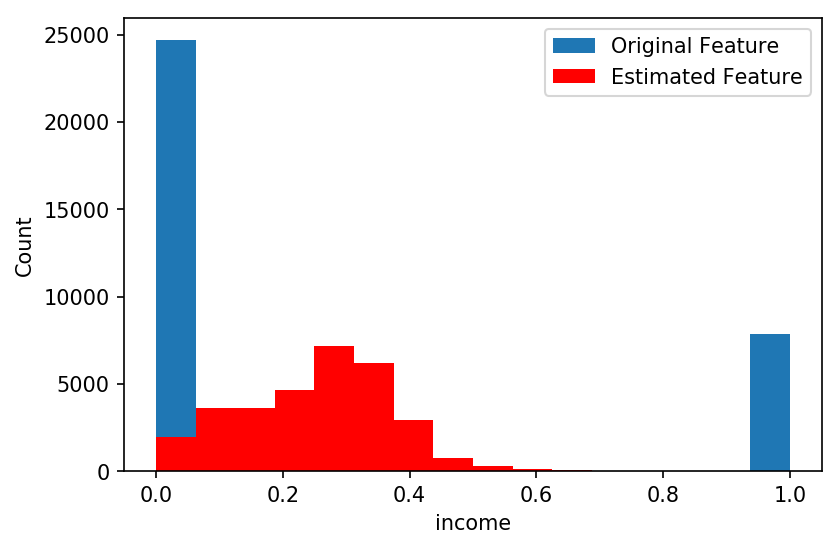

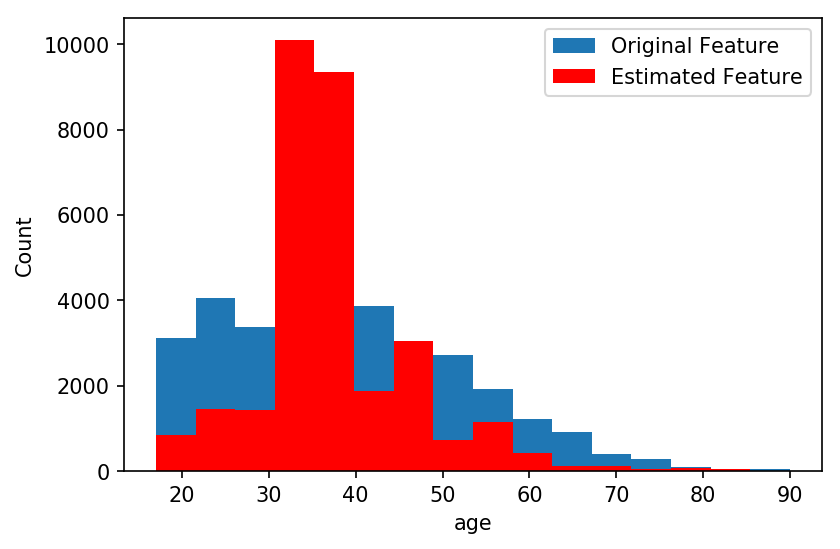

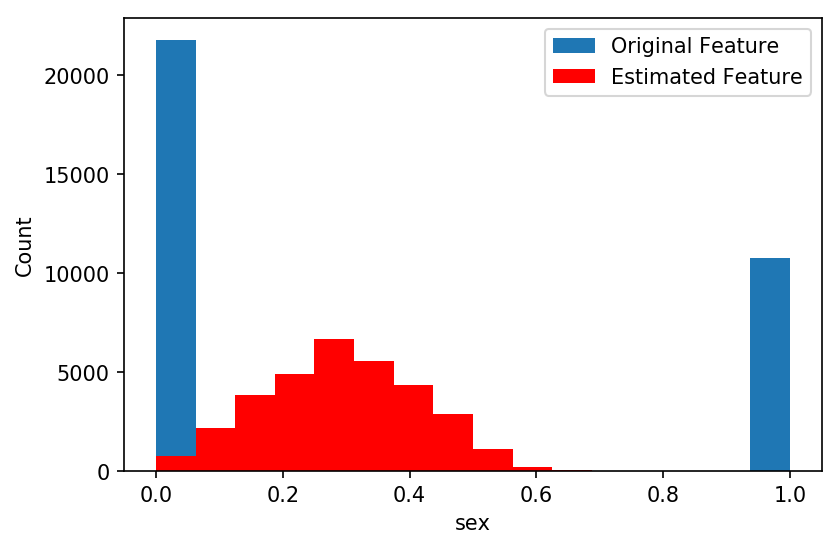

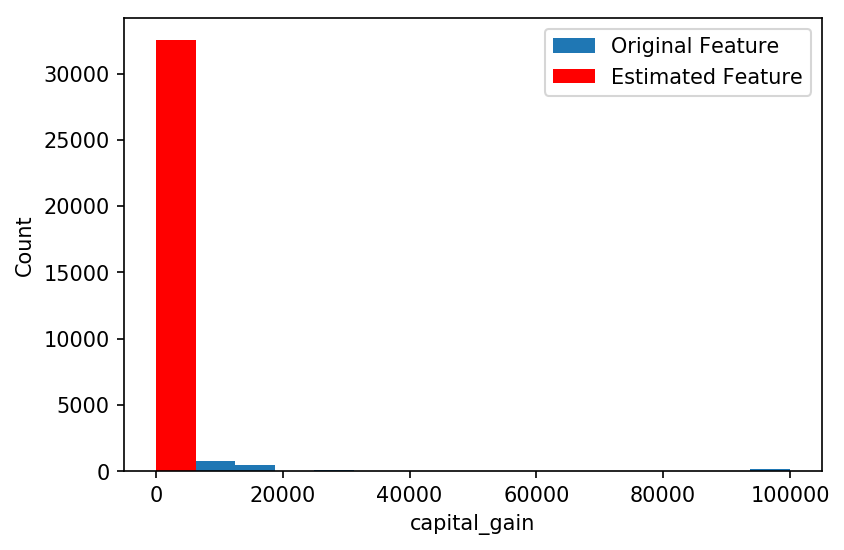

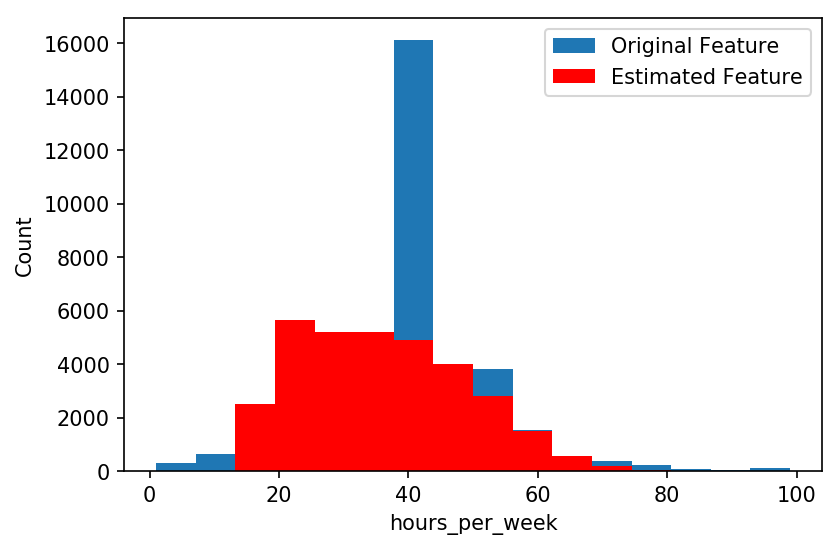

In [10]:
# Initialize to get minimum error and corresponding column-
min_err_1 = 1
min_err_col_1 = None

for col_name in columns:
    X_bar = X.loc[:, X.columns != col_name]
    X_i = X.loc[:, X.columns == col_name]
    
    # Get E[X_bar,X_bar^T] using corr(X) -
    corr_X_bar = corr.loc[:, corr.columns != col_name]
    corr_X_bar = corr_X_bar.T.loc[:, corr.columns != col_name]
    corr_X_bar = corr_X_bar.T
    
    # Get E[X_bar,X_i] using corr(X) -
    corr_X_bar_X_i = corr.loc[:, corr.columns == col_name]
    corr_X_bar_X_i = corr_X_bar_X_i.T.loc[:, corr.columns != col_name]
    corr_X_bar_X_i = corr_X_bar_X_i.T
    
    # Compute E[X_bar,X_bar^T]^(-1) -
    inv_corr_X_bar = pd.DataFrame(np.linalg.pinv(corr_X_bar.values), corr_X_bar.columns, corr_X_bar.index)
    
    # Compute a-star -
    a_star = inv_corr_X_bar.dot(corr_X_bar_X_i)
    
    # Estimate the target feature - 
    X_i_est = X_bar.dot(a_star)
    
    # Compute error in the estimation -
    err = (X_i - X_i_est).pow(2).mean() / X_i.pow(2).mean()
    
    # Get the minimum error in all column estimation
    if err.min() < min_err_1:
        min_err_1 = err.min()
        min_err_col_1 = col_name
    print(err)
    
    # Plot figures
    range_min = X_i.min().values
    range_max = X_i.max().values
    bins = np.ceil(1 + 3.322*np.log10(N)).astype(np.int64) 
    
    fig = plt.figure(dpi = 150) 
    ax = fig.add_subplot(111)
    _ = ax.hist(X_i.values, bins = bins, range = (range_min, range_max))
    _ = ax.hist(X_i_est.values, bins = bins, range = (range_min, range_max),color = 'red')
    ax.legend(['Original Feature', 'Estimated Feature'])
    ax.set_ylabel("Count")
    ax.set_xlabel(col_name)
    name = "biased " + col_name + ".pdf"
    fig.savefig(name, bbox_inches = 'tight')


Q. Are the histograms similar?

Ans. The histograms don't seem similar for all features. However, the features $age$ and $hours$ _ $per$ _ $week$ have the most overlap.

## <span style="color:blue">3. Relative error for each prediction, given by $\dfrac{\mathbb{E}[(\textbf{X}_i - \widehat{\textbf{X}}_i)^2]}{\mathbb{E}[\textbf{X}^2_i]}$.</span> 

In [11]:
printmd("**Minimum relative error in column:** \n")
print(min_err_col_1)

printmd("**Corresponding relative error:** \n")
print(min_err_1) 

**Minimum relative error in column:** 


age


**Corresponding relative error:** 


0.16290624401293272


## <span style="color:blue">4. Repeat steps 2 and 3 with the de-biased vector $\textbf{X}_{\text{new}} = \textbf{X} - \mathbb{E}[\textbf{X}]$.</span> 

income    0.841516
dtype: float64
age    0.942956
dtype: float64
sex    0.917897
dtype: float64
capital_gain    0.948651
dtype: float64
hours_per_week    0.912547
dtype: float64




**For de-biased vector:**


**Minimum relative error in column:** 


income


**Corresponding relative error:** 


0.8415157333936801


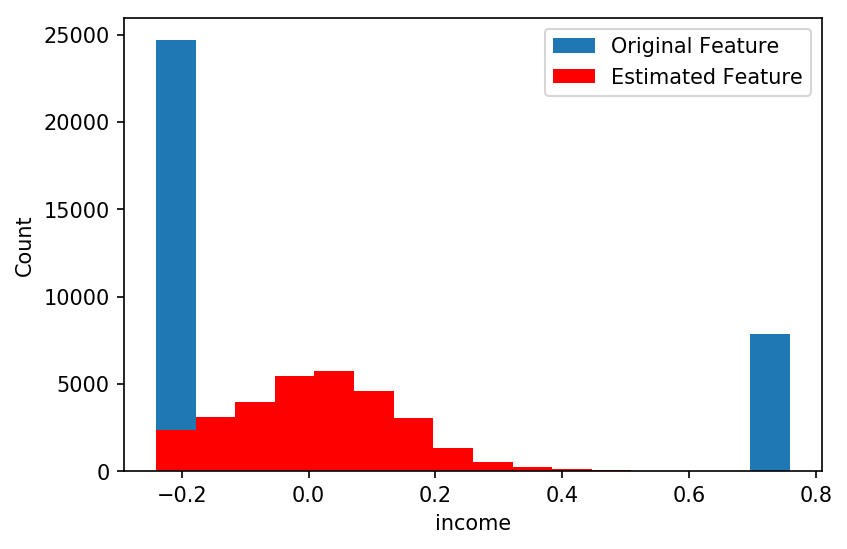

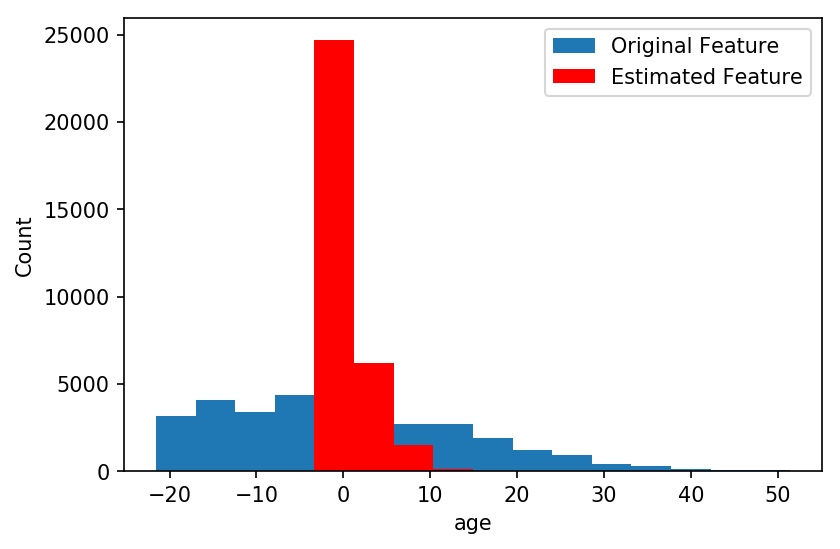

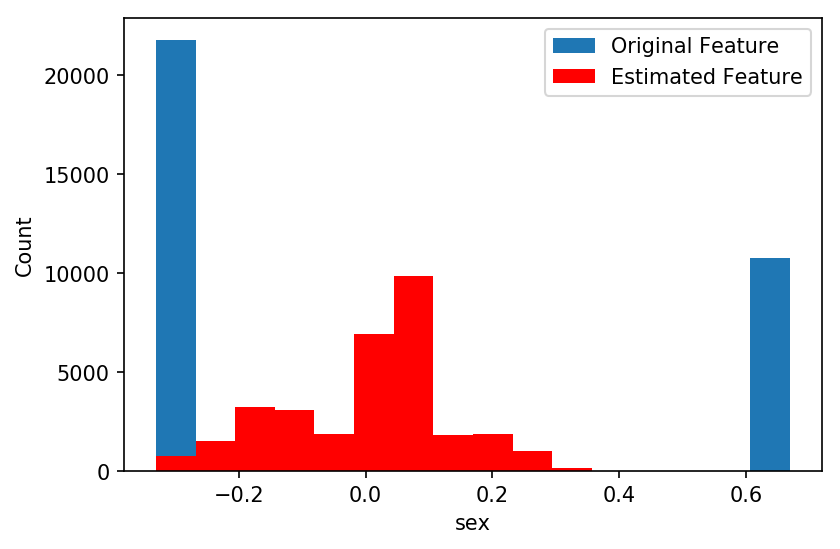

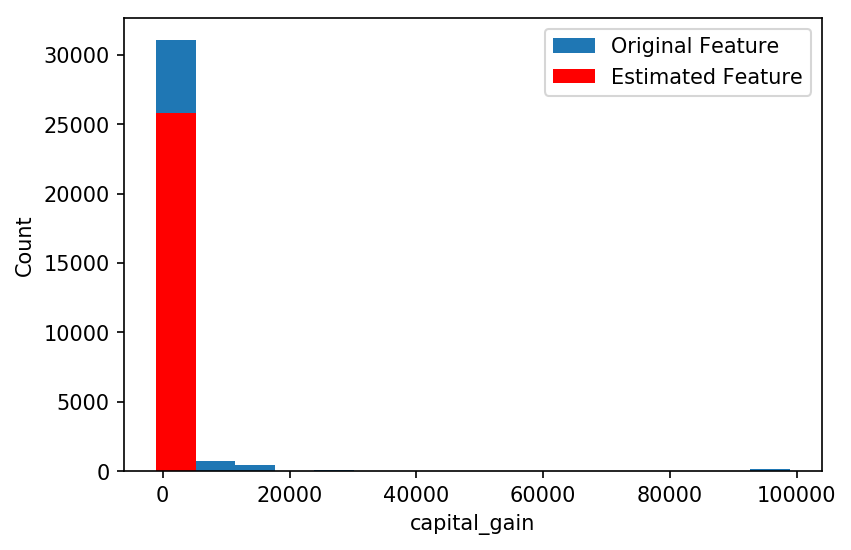

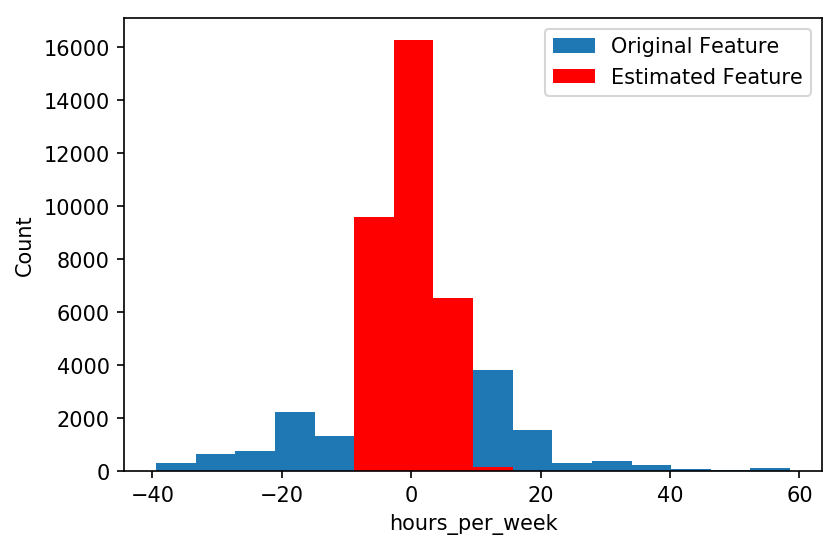

In [12]:
# Initialize to get minimum error and corresponding column-
min_err_2 = 1
min_err_col_2 = None

for col_name in columns:
    X_bar = X.loc[:, X.columns != col_name]
    X_i = X.loc[:, X.columns == col_name]
    
    # Get E[X_bar,X_bar^T] using cov(X) -
    corr_X_bar = cov.loc[:, corr.columns != col_name]
    corr_X_bar = corr_X_bar.T.loc[:, corr.columns != col_name]
    corr_X_bar = corr_X_bar.T
    
    # Get E[X_bar,X_i] using cov(X) -
    corr_X_bar_X_i = cov.loc[:, corr.columns == col_name]
    corr_X_bar_X_i = corr_X_bar_X_i.T.loc[:, corr.columns != col_name]
    corr_X_bar_X_i = corr_X_bar_X_i.T
    
    # Compute E[X_bar,X_bar^T]^(-1) -
    inv_corr_X_bar = pd.DataFrame(np.linalg.pinv(corr_X_bar.values), corr_X_bar.columns, corr_X_bar.index)
    
    # Compute a-star -
    a_star = inv_corr_X_bar.dot(corr_X_bar_X_i)
    
    # De-bias X_bar -
    X_bar = X_bar - X_bar.mean()
    
    # Estimate the target feature - 
    X_i_est = X_bar.dot(a_star)
    
    # De-bias X_i for computing error -
    X_i = X_i - X_i.mean()
    err = (X_i - X_i_est).pow(2).mean() / X_i.pow(2).mean()
    
    # Get the minimum error in all column estimation -
    if err.min() < min_err_2:
        min_err_2 = err.min()
        min_err_col_2 = col_name
    print(err)

    # Plot figures
    range_min = X_i.min().values
    range_max = X_i.max().values
    bins = np.ceil(1 + 3.322*np.log10(N)).astype(np.int64) 
    
    fig = plt.figure(dpi = 150)
    ax = fig.add_subplot(111)
    _ = ax.hist(X_i.values, bins = bins, range = (range_min, range_max))
    _ = ax.hist(X_i_est.values, bins = bins, range = (range_min, range_max),color = 'red')
    ax.legend(['Original Feature', 'Estimated Feature'])
    ax.set_ylabel("Count")
    ax.set_xlabel(col_name)
    name = "de-biased " + col_name + ".pdf"
    fig.savefig(name, bbox_inches = 'tight')

print('\n')
printmd("**For de-biased vector:**\n")
printmd("**Minimum relative error in column:** \n")
print(min_err_col_2)

printmd("**Corresponding relative error:** \n")
print(min_err_2)    


$\bullet$ <b> Feel free to comment on any difference on the relative error (when using $\textbf{X}_{\text{new}}$ rather than $\textbf{X}$).</b> <br>
Ans: The error has increased with $\textbf{X}_{\text{new}}$ when compared to $\textbf{X}$.

## <span style="color:blue">5. Feature with most predictability:</span> 

In [13]:
printmd("**For biased vector:**\n")
printmd("**Feature with most predictability:** \n")
print(min_err_col_1)

print('\n')
printmd("**For de-biased vector:**\n")
printmd("**Feature with most predictability:** \n")
print(min_err_col_2)

**For biased vector:**


**Feature with most predictability:** 


age




**For de-biased vector:**


**Feature with most predictability:** 


income
